In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("avocado.csv")

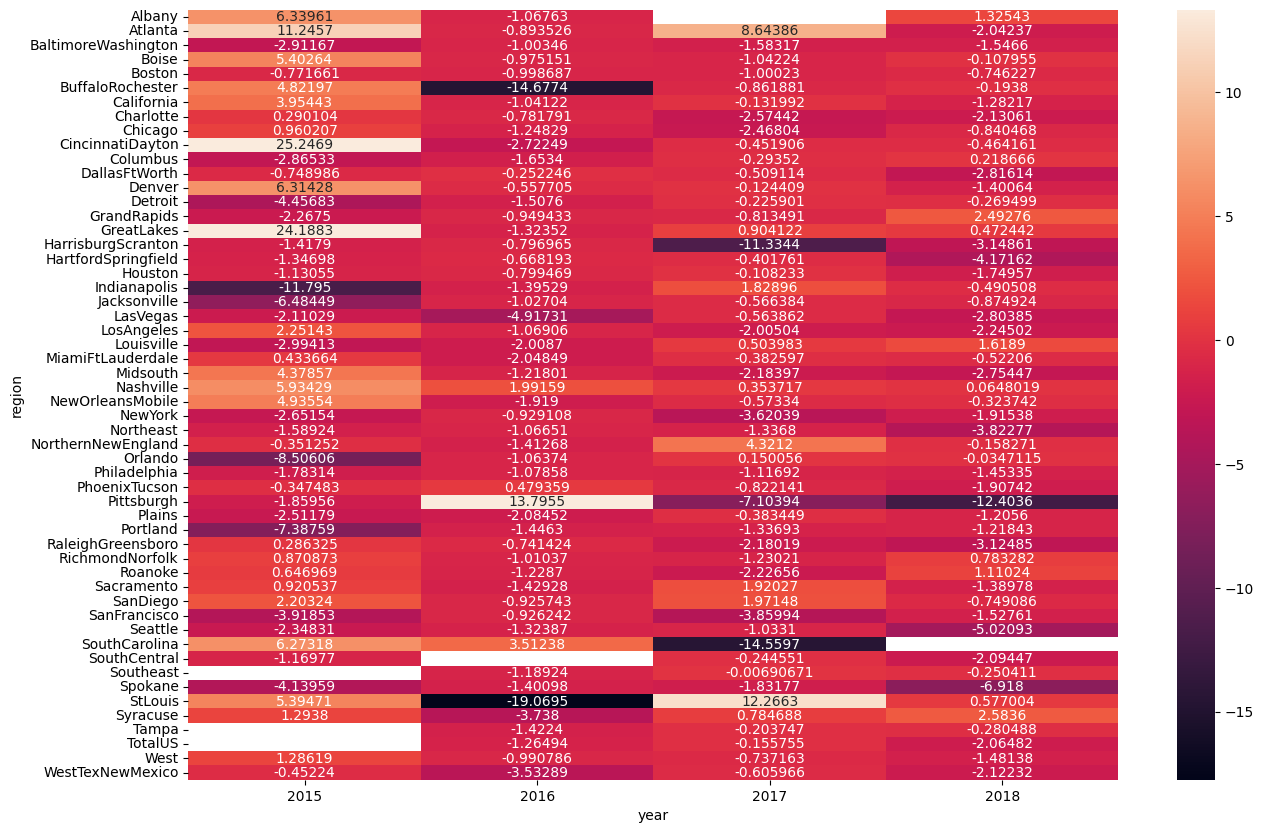

In [39]:
#Elasticidad Precio-Demanda por Año

"""
Aquí añado las columnas de region y tipo de aguacate (normal y organico) para hacer varios analisis por region
"""

df_elast=df.loc[:,["Total Volume","AveragePrice","year","Date","region","type"]]
df_elast["Date"]=pd.to_datetime(df_elast["Date"])



df_orden=df_elast.sort_values(by=['Date', "region"])

#aguacate convencional anual

"""
hago a mano la tabla para trabajar de forma anual con los guacates y calcular elasticidad para acabar haciendo un heatmap
"""


conventional=df_orden.loc[df_orden['type'] == "conventional"].reset_index()

val_max_con=conventional.loc[conventional.groupby(by=["year","region"])["Date"].idxmax()].reset_index()
val_max_con.rename({"Date": "Date_max", "AveragePrice": "Avg_max", "Total Volume":"Total Volume_max"}, inplace=True, axis=1)

val_min_con=conventional.loc[conventional.groupby(by=["year","region"])["Date"].idxmin()].reset_index()
val_min_con.rename({"Date": "Date_min", "AveragePrice": "Avg_min", "Total Volume":"Total Volume_min"},inplace=True, axis=1)


min_max_con=pd.concat([val_max_con,val_min_con["Date_min"], val_min_con["Avg_min"], val_min_con["Total Volume_min"]], axis=1)


#min_max["Total Volume_max"]==min_max["Total Volume_min"]

val_min_con
min_max_con["Elasticidad"]=((min_max_con["Total Volume_max"]-min_max_con["Total Volume_min"])/min_max_con["Total Volume_min"])/((min_max_con["Avg_max"]-min_max_con["Avg_min"])/min_max_con["Avg_min"])

"""
Una vez hecha esta tabla se hace un heatmap para encontrar valores anómalos
"""
plt.figure(figsize=(15,10))
heat_min_max_con=min_max_con.pivot(index="region", columns="year", values="Elasticidad")

sns.heatmap(heat_min_max_con, annot=True, fmt="g", robust=True)
plt.show()



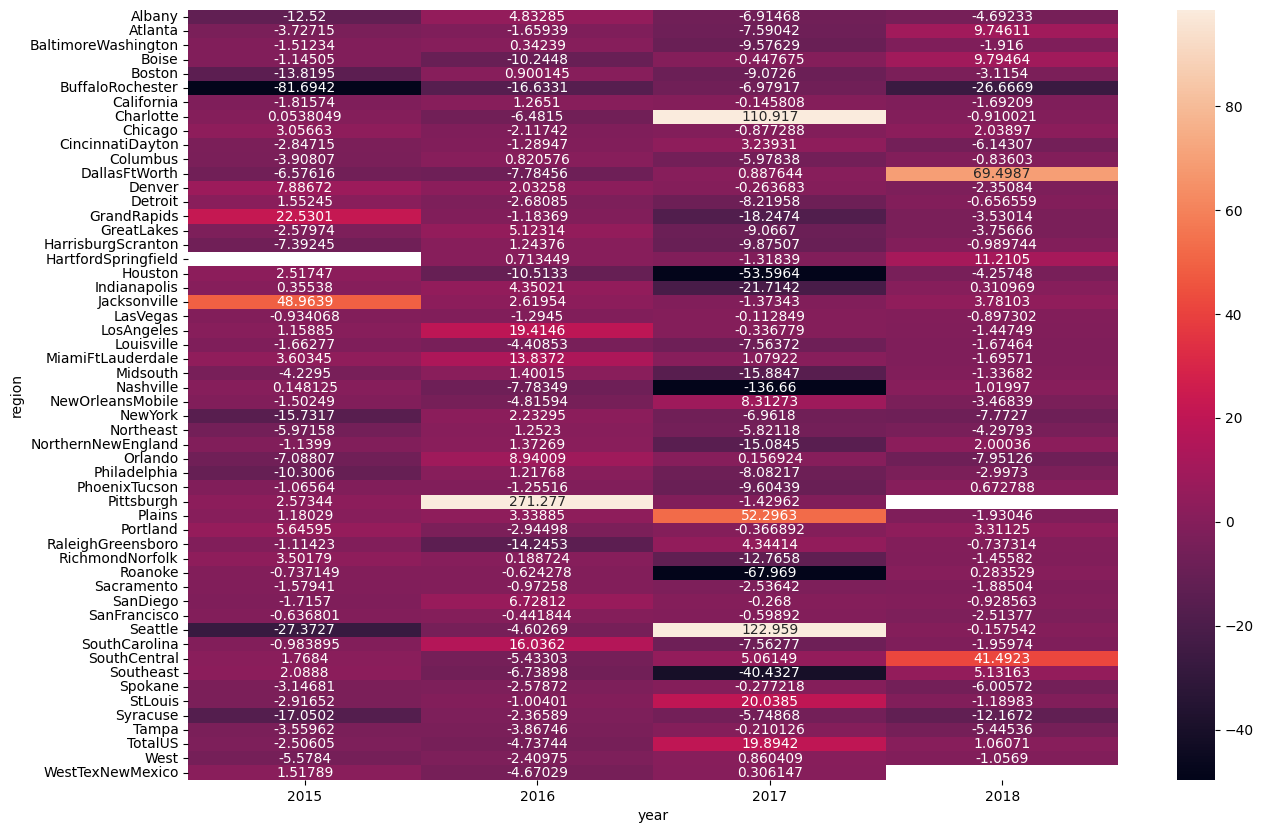

,level_0,index,Total Volume_max,Avg_max,year,Date_max,region,type,Date_min,Avg_min,Total Volume_min,Elasticidad
0,2753,9126,989.55,1.83,2015,2015-12-27,Albany,organic,2015-01-04,1.79,1373.95,-12.520033
1,2754,9178,3195.00,1.84,2015,2015-12-27,Atlanta,organic,2015-01-04,1.76,3846.69,-3.727147
2,2755,9230,14201.42,1.51,2015,2015-12-27,BaltimoreWashington,organic,2015-01-04,1.29,19137.28,-1.512341
3,2756,9282,2272.26,0.91,2015,2015-12-27,Boise,organic,2015-01-04,1.64,1505.12,-1.145050
4,2757,9334,7986.08,1.48,2015,2015-12-27,Boston,organic,2015-01-04,1.83,2192.13,-13.819473
...,...,...,...,...,...,...,...,...,...,...,...,...
211,9118,18189,14503.47,1.04,2018,2018-03-25,Syracuse,organic,2018-01-07,1.25,4764.47,-12.167196
212,9119,18201,10028.49,1.41,2018,2018-03-25,Tampa,organic,2018-01-07,1.51,7370.53,-5.445361
213,9120,18213,1559967.20,1.55,2018,2018-03-25,TotalUS,organic,2018-01-07,1.51,1517332.70,1.060712
214,9121,18225,271723.08,1.60,2018,2018-03-25,West,organic,2018-01-07,1.48,297190.60,-1.056896


In [37]:
#aguacate organico anual

organic=df_orden.loc[df_orden['type'] == "organic"].reset_index()

val_max_org=organic.loc[organic.groupby(by=["year","region"])["Date"].idxmax()].reset_index()
val_max_org.rename({"Date": "Date_max", "AveragePrice": "Avg_max", "Total Volume":"Total Volume_max"}, inplace=True, axis=1)

val_min_org=organic.loc[organic.groupby(by=["year","region"])["Date"].idxmin()].reset_index()
val_min_org.rename({"Date": "Date_min", "AveragePrice": "Avg_min", "Total Volume":"Total Volume_min"},inplace=True, axis=1)


min_max_org=pd.concat([val_max_org,val_min_con["Date_min"], val_min_org["Avg_min"], val_min_org["Total Volume_min"]], axis=1)


#min_max["Total Volume_max"]==min_max["Total Volume_min"]

min_max_org["Elasticidad"]=((min_max_org["Total Volume_max"]-min_max_org["Total Volume_min"])/min_max_org["Total Volume_min"])/((min_max_org["Avg_max"]-min_max_org["Avg_min"])/min_max_org["Avg_min"])



plt.figure(figsize=(15,10))
heat_min_max_org=min_max_org.pivot(index="region", columns="year", values="Elasticidad")

sns.heatmap(heat_min_max_org, annot=True, fmt="g", robust=True)
plt.show()




Aquí se ve una discrepancia brutal en el año 2017 entre aguacates organicos y convencionales. Mientras los convencionales más o menos mantienen
elasticidad entre [-1,1], lo que quiere decir que pequeños cambios en el precio no influyen demasiado en la demanda; en los organicos, los valores que se tienen para varias regiones tienen valores muy altos. Esto quiere decir que pequeños cambios en el precio influyen muchisimo en la demanda.

In [ ]:
#analizamos la elasticidad por meses para el año 2017